## [2] A Convolutional Neural Network for Gender Recognition Optimizing the Accuracy/Speed Tradeoff
<img src="images/[2].png"> <br>
https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/MobileNet

First we need to import used libraries:

In [1]:
import tensorflow as tf, pandas as pd, matplotlib.pyplot as plt, numpy as np, os, sys
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  BatchNormalization, DepthwiseConv2D, ReLU, AvgPool2D, Input
from keras.utils import load_img, plot_model
from keras.applications.mobilenet import MobileNet
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# sys.path[1:1] = [sys.path[1] + "\\helper"]
sys.path.insert(1, '\\helper')
from helper import ran, resnet
# from helper.prepare_data import prepare_data

ImportError: cannot import name 'ran' from 'helper' (unknown location)

First, we pick the dataset that we would like to use from:
<br>1 - Age, gender, ethnicity CSV
<br>2 - UTKFace
<br>3 - Fairface

In [ ]:
choice = 3

Prepare data from each dataset so that we end up with normalized pixels and labels:

In [ ]:
x, y_age, y_gender, y_ethnicity, img_size = prepare_data(choice = choice)

Display some exemplary images:

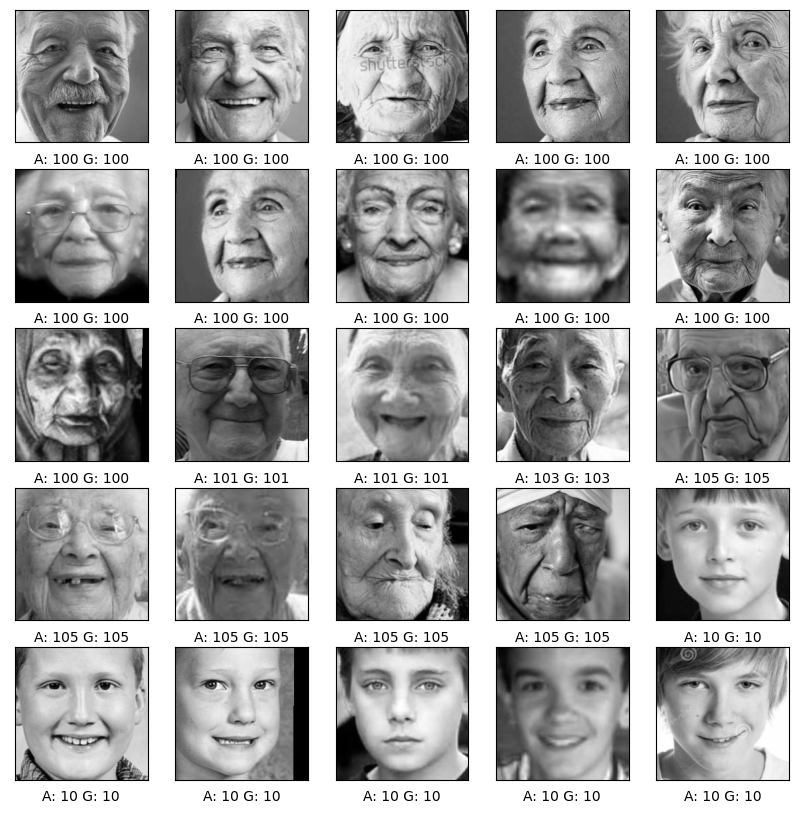

In [ ]:
# size of the whole grid of images
plt.figure(figsize=(10, 10))

# display first 25 images in a 5x5 grid
for i in range(0, 25):
    plt.subplot(5, 5, (i % 25) + 1)
    plt.grid(False)
    #disable x and y axis description
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i].reshape(img_size, img_size), cmap='gray')
    # A = age, G = gender, E = ethnicity
    plt.xlabel("A: "+ str(y_age[i]) + " G: " + str(y_gender[i]) + (" E: " + str(y_ethnicity[i]) if y_ethnicity.size > 0 else ""))
plt.show()

MobileNet implementation:

In [ ]:
# def mobilnet_block(layer, filters, strides):
    
#     layer = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(layer)
#     layer = BatchNormalization()(layer)
#     layer = ReLU()(layer)
    
#     layer = Conv2D(filters = filters, kernel_size = 1, strides = 1)(layer)
#     layer = BatchNormalization()(layer)
#     layer = ReLU()(layer)
    
#     return layer

# input = Input(shape = (img_size, img_size, 3))
# layer = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input)
# layer = BatchNormalization()(layer)
# layer = ReLU()(layer)

# layer = mobilnet_block(layer, filters = 64, strides = 1)
# layer = mobilnet_block(layer, filters = 128, strides = 2)
# layer = mobilnet_block(layer, filters = 128, strides = 1)
# layer = mobilnet_block(layer, filters = 256, strides = 2)
# layer = mobilnet_block(layer, filters = 256, strides = 1)
# layer = mobilnet_block(layer, filters = 512, strides = 2)
# for _ in range (5):
#      layer = mobilnet_block(layer, filters = 512, strides = 1)
# layer = mobilnet_block(layer, filters = 1024, strides = 2)
# layer = mobilnet_block(layer, filters = 1024, strides = 1)
# layer = AvgPool2D(pool_size = 7, strides = 1, data_format = 'channels_last') (layer)

# output = Dense (units = 1000, activation = 'softmax')(layer)

# model = Model(inputs = input, outputs = output)
# model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
# # model.summary()

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/MobileNet
model = MobileNet()
x
model.predict(x)

ValueError: in user code:

    File "c:\Python\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "c:\Python\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Python\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "c:\Python\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "mobilenet_1.00_224" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 200, 200, 1)


In [ ]:
history = model.fit(x, y_age , epochs = 10, validation_split = 0.2)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
acc = np.array(history.history['accuracy'])
val_acc = np.array(history.history['val_accuracy'])
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Age Accuracy Graph')
plt.legend()